# KAEDIM CV

### Importing Libraries

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from keras.applications.xception import Xception,preprocess_input
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.models import Model
from keras.preprocessing import image
from keras.layers import Input
from keras.backend import reshape
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### load data

In [2]:
img_folder = r'/Users/bhanukiran/Desktop/kaedim cv/dataset/'

### Building the model

First we need to get the paths to the image, and it is done by using the function below.

getImagePaths - joins the directory name and the filename and outputs a full file path

In [3]:
def getImagePaths(path):
    image_names = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            fullpath = os.path.join(dirname, filename)
            image_names.append(fullpath)
    return image_names

Now we have to load the data and the function below builds an array called output and outputs the files into the output array

In [4]:
def load_data():
    output=[]
    output=getImagePaths(img_folder)[:10000]
    return output

The images need to be preprocessed before we can put them into the model as CNN takes an image of dimensions 244,244

In [5]:
def preprocess_img(img_path):
    dsize = (224,224)
    new_image=cv2.imread(img_path)
    new_image=cv2.resize(new_image,dsize,interpolation=cv2.INTER_NEAREST)  
    new_image=np.expand_dims(new_image,axis=0)
    new_image=preprocess_input(new_image)
    return new_image


We defind the model and feature extraction 

In [6]:
def model():
    #model=Xception(weights='imagenet',include_top=False)
    base_model = VGG19(weights='imagenet', classifier_activation="softmax",)
    model = Model(inputs = base_model.input, outputs = base_model.get_layer('fc1').output)
    
    for layer in model.layers:
        layer.trainable=False
        
    return model

def feature_extraction(image_data,model):
    features=model.predict(image_data)
    features=np.array(features)
    features=features.flatten()
    return features

Vector cosine is used as a similarity metric

In [7]:
def result_vector_cosine(model,feature_vector,new_img):
    new_feature = model.predict(new_img)
    new_feature = np.array(new_feature)
    new_feature = new_feature.flatten()
    N_result = 12
    nbrs = NearestNeighbors(n_neighbors=N_result, metric="cosine").fit(feature_vector)
    distances, indices = nbrs.kneighbors([new_feature])
    return(indices)

Defining the output grid

In [8]:
def input_show(data):
    plt.title("Query Image")
    plt.imshow(data)
  
def show_result(data,result):
    fig = plt.figure(figsize=(12,8))
    for i in range(0,12):
        index_result=result[0][i]
        plt.subplot(3,4,i+1)
        plt.imshow(cv2.imread(data[index_result]))
    plt.show()

Main function---

In [9]:
def main():  
    features=[]
    output=load_data()
    main_model=model()
    #Limiting the data for training
    for i in output[:3300]:
        new_img=preprocess_img(i)
        features.append(feature_extraction(new_img,main_model))
    feature_vec = np.array(features)
    result=result_vector_cosine(main_model,feature_vec,preprocess_img(output[1000]))
    input_show(cv2.imread(output[1000]))
    show_result(output,result)
  



1/1 [==============================] - 0s 196ms/step


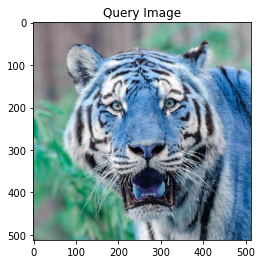

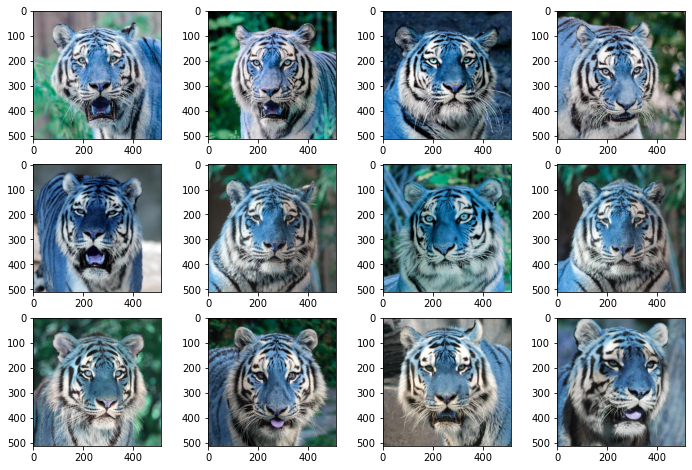

In [10]:
if __name__=='__main__':
    main()

# Version History


## Version 1

Pokemon dataset used and the output is all blue pokemons, some of them have similarities on Keras Xception model

## Version 2 

Changes the dataset to cars dataset on keras Xception model, for a dodge charger it showed pickup trucks as similar

## Version 3

Changes model from Xception to vgg16, somwhat accurate results as the car is shaped sideways and all sideways pointing cars are shown

## Version 4

Changes model from vgg16 to vgg19, and increased training set to 70% of 8000 = 5600. Took a lot of time for model to complete training. But, the output shoes images of vans, out of 12 images 6 vans of similar shape even though pic from different perspective. other 6 are mishits but shaped similar to the image of van

#### NOTE: All these models use cosine similarity with nearest neighbours
